# 1. Import Required Libraries
Import Python libraries such as os, sys, pandas, and any custom modules from the codebase.

In [ ]:
%pip install matplotlib

import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
sys.path.append(os.path.abspath('..'))
from pfal_sim.crop import spinach

# Display pandas settings for easier debugging
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 120)


Note: you may need to restart the kernel to use updated packages.


# 2. Load and Inspect the Codebase
Load relevant source files and display key functions or classes related to biomass calculation.

In [8]:
# Load simulation log
data_path = os.path.join(os.pardir, 'sim_log.parquet')
df = pd.read_parquet(data_path)
df.head()

,time,PPFD,DLI_so_far,T,RH,VPD,CO2,EC,pH,LED_W,HVAC_W,act_LED,act_HVAC
0,2025-09-08 06:00:00,256.410256,0.153846,-3.775748e+01,1.0,0.000000e+00,899.999962,1.5,6.0,284.48504,0.0,ON,IDLE
1,2025-09-08 06:10:00,256.410256,0.307692,5.180233e+03,1.0,0.000000e+00,899.999923,1.5,6.0,284.48504,1000.0,ON,HEAT
2,2025-09-08 06:20:00,256.410256,0.461538,-5.104008e+05,0.0,1.948289e+07,899.999885,1.5,6.0,284.48504,1000.0,ON,COOL
3,2025-09-08 06:30:00,256.410256,0.615385,5.053112e+07,1.0,0.000000e+00,899.999846,1.5,6.0,284.48504,1000.0,ON,HEAT
4,2025-09-08 06:40:00,256.410256,0.769231,-5.002579e+09,0.0,1.932703e+07,899.999808,1.5,6.0,284.48504,1000.0,ON,COOL


# 3. Identify Biomass Calculation Logic
Locate and display the code responsible for calculating or updating the biomass variable.

In [9]:
# Display the biomass increment function
from pfal_sim.crop import spinach
import inspect
print(inspect.getsource(spinach.daily_biomass_increment))

def daily_biomass_increment(DLI, T_mean, VPD_mean, CO2_mean):
    """
    Compute daily fresh weight increment (g/m2/day)
    """
    return ALPHA * f_DLI(DLI) * f_T(T_mean) * f_VPD(VPD_mean) * f_CO2(CO2_mean)



# 4. Trace Input Data for Biomass
Examine the input data or parameters that feed into the biomass calculation, and display sample values.

In [10]:
# Show summary statistics for biomass inputs
print('DLI_so_far:')
display(df['DLI_so_far'].describe())
print('T:')
display(df['T'].describe())
print('VPD:')
display(df['VPD'].describe())
print('CO2:')
display(df['CO2'].describe())

DLI_so_far:


count    4320.000000
mean        8.791667
std         3.900289
min         0.153846
25%         5.653846
50%        11.153846
75%        12.000000
max        12.000000
Name: DLI_so_far, dtype: float64

T:


/home/hardik/Documents/pfal-sim/.venv/lib/python3.12/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


count     1.540000e+02
mean               inf
std                NaN
min     -1.130323e+305
25%     -1.819718e+153
50%       2.571238e+03
75%      1.801520e+155
max                inf
Name: T, dtype: float64

VPD:


count    4.320000e+03
mean     3.400483e+05
std      2.541394e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.948289e+07
Name: VPD, dtype: float64

CO2:


count    4320.000000
mean      899.954306
std         0.025985
min       899.910009
25%       899.931228
50%       899.954985
75%       899.976204
max       899.999962
Name: CO2, dtype: float64

# 5. Add Debugging Statements
Insert print or logging statements in the biomass calculation code to monitor intermediate values.

In [11]:
# Simulate a call to daily_biomass_increment with mean values
mean_DLI = df['DLI_so_far'].mean()
mean_T = df['T'].mean()
mean_VPD = df['VPD'].mean()
mean_CO2 = df['CO2'].mean()

print(f"Mean DLI: {mean_DLI}")
print(f"Mean T: {mean_T}")
print(f"Mean VPD: {mean_VPD}")
print(f"Mean CO2: {mean_CO2}")

# Call the function and print result
biomass_inc = spinach.daily_biomass_increment(mean_DLI, mean_T, mean_VPD, mean_CO2)
print(f"Biomass increment for mean values: {biomass_inc}")

Mean DLI: 8.791666666666666
Mean T: inf
Mean VPD: 340048.3465816839
Mean CO2: 899.954306380365
Biomass increment for mean values: 0.0


# 6. Run Diagnostic Tests
Execute test cases or sample runs to observe the behavior of the biomass variable and capture outputs.

In [12]:
# Test biomass increment over a range of plausible values
for DLI in [0, 5, 10, 15]:
    for T in [10, 20, 30]:
        for VPD in [0.5, 1.0, 2.0]:
            for CO2 in [400, 900, 1200]:
                inc = spinach.daily_biomass_increment(DLI, T, VPD, CO2)
                print(f"DLI={DLI}, T={T}, VPD={VPD}, CO2={CO2} => Biomass increment: {inc}")

DLI=0, T=10, VPD=0.5, CO2=400 => Biomass increment: 0.0
DLI=0, T=10, VPD=0.5, CO2=900 => Biomass increment: 0.0
DLI=0, T=10, VPD=0.5, CO2=1200 => Biomass increment: 0.0
DLI=0, T=10, VPD=1.0, CO2=400 => Biomass increment: 0.0
DLI=0, T=10, VPD=1.0, CO2=900 => Biomass increment: 0.0
DLI=0, T=10, VPD=1.0, CO2=1200 => Biomass increment: 0.0
DLI=0, T=10, VPD=2.0, CO2=400 => Biomass increment: 0.0
DLI=0, T=10, VPD=2.0, CO2=900 => Biomass increment: 0.0
DLI=0, T=10, VPD=2.0, CO2=1200 => Biomass increment: 0.0
DLI=0, T=20, VPD=0.5, CO2=400 => Biomass increment: 0.0
DLI=0, T=20, VPD=0.5, CO2=900 => Biomass increment: 0.0
DLI=0, T=20, VPD=0.5, CO2=1200 => Biomass increment: 0.0
DLI=0, T=20, VPD=1.0, CO2=400 => Biomass increment: 0.0
DLI=0, T=20, VPD=1.0, CO2=900 => Biomass increment: 0.0
DLI=0, T=20, VPD=1.0, CO2=1200 => Biomass increment: 0.0
DLI=0, T=20, VPD=2.0, CO2=400 => Biomass increment: 0.0
DLI=0, T=20, VPD=2.0, CO2=900 => Biomass increment: 0.0
DLI=0, T=20, VPD=2.0, CO2=1200 => Biomass i

# 7. Visualize Biomass Values Over Time
Plot the biomass values across iterations or time steps to identify patterns or issues.

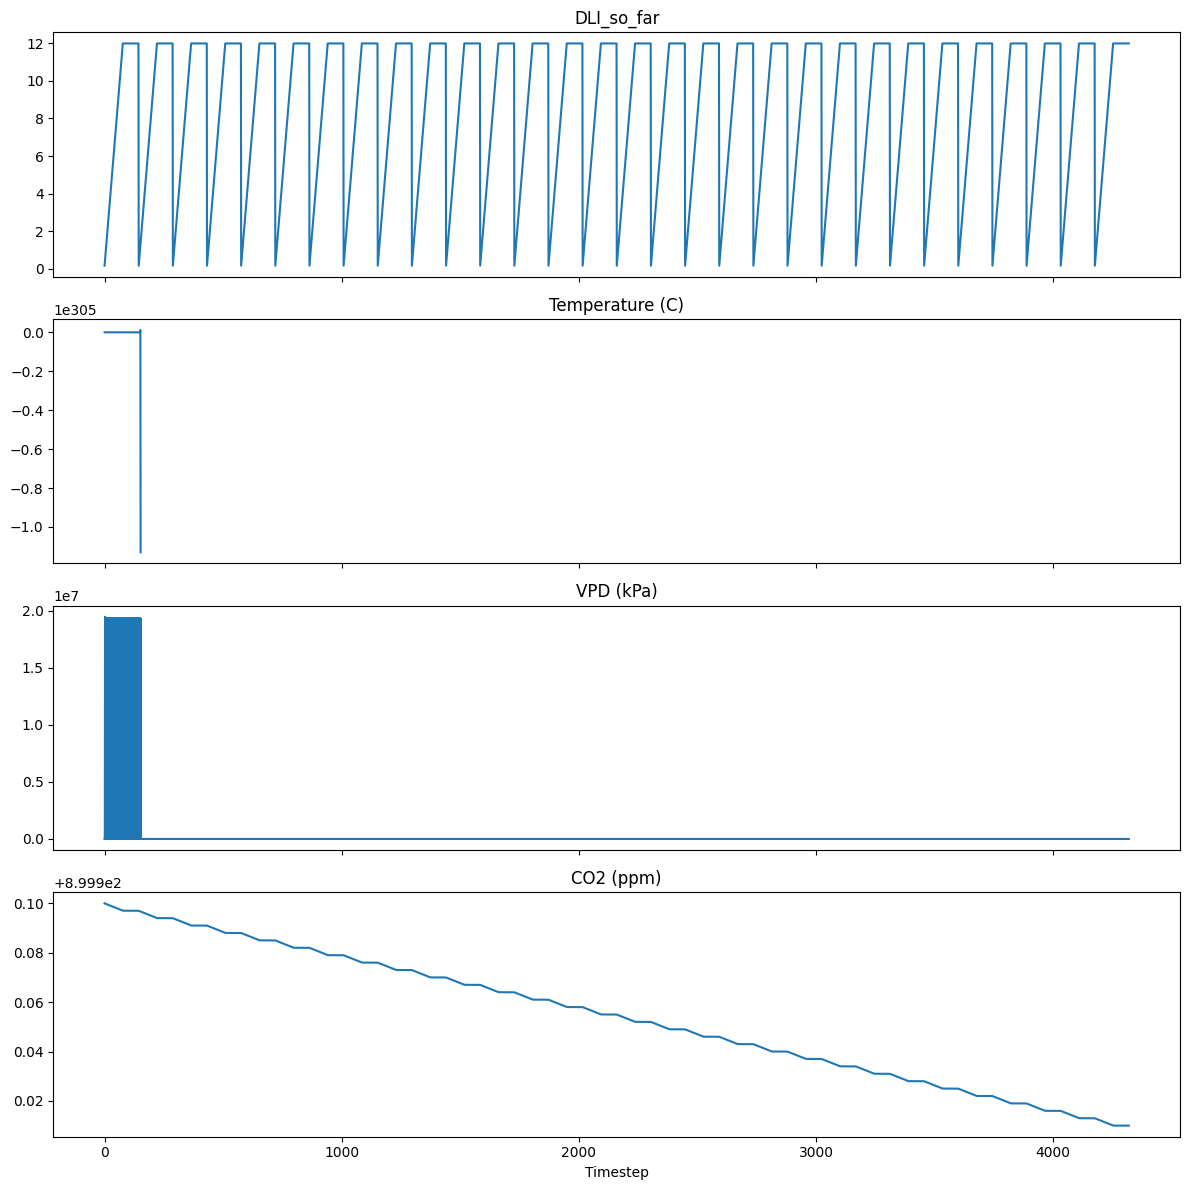

In [13]:
# Plot DLI, T, VPD, and CO2 over time
fig, axs = plt.subplots(4, 1, figsize=(12, 12), sharex=True)
df['DLI_so_far'].plot(ax=axs[0], title='DLI_so_far')
df['T'].plot(ax=axs[1], title='Temperature (C)')
df['VPD'].plot(ax=axs[2], title='VPD (kPa)')
df['CO2'].plot(ax=axs[3], title='CO2 (ppm)')
plt.xlabel('Timestep')
plt.tight_layout()
plt.show()

In [14]:
# Debug: Show each response function output for mean values
print('Mean DLI:', mean_DLI)
print('f_DLI:', spinach.f_DLI(mean_DLI))
print('Mean T:', mean_T)
print('f_T:', spinach.f_T(mean_T))
print('Mean VPD:', mean_VPD)
print('f_VPD:', spinach.f_VPD(mean_VPD))
print('Mean CO2:', mean_CO2)
print('f_CO2:', spinach.f_CO2(mean_CO2))

Mean DLI: 8.791666666666666
f_DLI: 0.8791666666666667
Mean T: inf
f_T: 0.0
Mean VPD: 340048.3465816839
f_VPD: 0.0
Mean CO2: 899.954306380365
f_CO2: 0.899954306380365
